In [81]:
import pickle
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [82]:
with open('/content/train_qa.txt', 'rb') as fp:
  trainData = pickle.load(fp)

In [83]:
trainData

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [84]:
type(trainData)

list

In [85]:
with open('/content/test_qa.txt', 'rb') as fp:
  testData = pickle.load(fp)

In [86]:
testData

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [87]:
type(testData)

list

In [88]:
len(trainData)

10000

In [89]:
len(testData)

1000

In [90]:
#Story of train data
' '.join(trainData[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [91]:
#Question of train data
' '.join(trainData[0][1])

'Is Sandra in the hallway ?'

In [92]:
#Answer of train data
trainData[0][2]

'no'

In [93]:
#Story of test data
' '.join(testData[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [94]:
#Question of test data
' '.join(testData[0][1])

'Is John in the kitchen ?'

In [95]:
#Answer of test data
testData[0][2]

'no'

In [96]:
vocab = set()

In [97]:
all_data = testData + trainData

In [98]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [99]:
type(all_data)

list

In [100]:
for story, question, answer in all_data:
  vocab = vocab.union(set(story))
  vocab = vocab.union(set(question))

In [101]:
vocab.add('yes')
vocab.add('no')

In [102]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [103]:
len(vocab)

37

In [104]:
vocab_len = len(vocab) + 1

In [105]:
for data in all_data:
  print(data[0]) #Story part only
  print("\n")

Streaming output truncated to the last 5000 lines.
['Daniel', 'went', 'to', 'the', 'garden', '.', 'John', 'got', 'the', 'apple', 'there', '.', 'Sandra', 'moved', 'to', 'the', 'hallway', '.', 'John', 'went', 'to', 'the', 'office', '.', 'Daniel', 'went', 'to', 'the', 'kitchen', '.', 'Daniel', 'journeyed', 'to', 'the', 'garden', '.']


['Daniel', 'went', 'to', 'the', 'garden', '.', 'John', 'got', 'the', 'apple', 'there', '.', 'Sandra', 'moved', 'to', 'the', 'hallway', '.', 'John', 'went', 'to', 'the', 'office', '.', 'Daniel', 'went', 'to', 'the', 'kitchen', '.', 'Daniel', 'journeyed', 'to', 'the', 'garden', '.', 'Mary', 'went', 'to', 'the', 'bathroom', '.', 'John', 'moved', 'to', 'the', 'bathroom', '.']


['Daniel', 'went', 'to', 'the', 'garden', '.', 'John', 'got', 'the', 'apple', 'there', '.', 'Sandra', 'moved', 'to', 'the', 'hallway', '.', 'John', 'went', 'to', 'the', 'office', '.', 'Daniel', 'went', 'to', 'the', 'kitchen', '.', 'Daniel', 'journeyed', 'to', 'the', 'garden', '.', 'Mary'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [106]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [107]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [108]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [109]:
tokenizer = Tokenizer(filters = [])

In [110]:
tokenizer.fit_on_texts(vocab)

In [111]:
tokenizer.word_index

{'.': 25,
 '?': 26,
 'apple': 6,
 'back': 11,
 'bathroom': 23,
 'bedroom': 1,
 'daniel': 2,
 'discarded': 20,
 'down': 34,
 'dropped': 29,
 'football': 28,
 'garden': 31,
 'got': 17,
 'grabbed': 37,
 'hallway': 4,
 'in': 3,
 'is': 22,
 'john': 12,
 'journeyed': 32,
 'kitchen': 36,
 'left': 7,
 'mary': 24,
 'milk': 14,
 'moved': 10,
 'no': 9,
 'office': 19,
 'picked': 18,
 'put': 15,
 'sandra': 21,
 'the': 16,
 'there': 5,
 'to': 8,
 'took': 33,
 'travelled': 27,
 'up': 35,
 'went': 13,
 'yes': 30}

In [112]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in trainData:
  train_story_text.append(story)
  train_question_text.append(question)

In [113]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [114]:
len(train_story_text)

10000

In [115]:
len(train_story_seq)

10000

In [116]:
train_story_seq

[[24, 10, 8, 16, 23, 25, 21, 32, 8, 16, 1, 25],
 [24,
  10,
  8,
  16,
  23,
  25,
  21,
  32,
  8,
  16,
  1,
  25,
  24,
  13,
  11,
  8,
  16,
  1,
  25,
  2,
  13,
  11,
  8,
  16,
  4,
  25],
 [24,
  10,
  8,
  16,
  23,
  25,
  21,
  32,
  8,
  16,
  1,
  25,
  24,
  13,
  11,
  8,
  16,
  1,
  25,
  2,
  13,
  11,
  8,
  16,
  4,
  25,
  21,
  13,
  8,
  16,
  36,
  25,
  2,
  13,
  11,
  8,
  16,
  23,
  25],
 [24,
  10,
  8,
  16,
  23,
  25,
  21,
  32,
  8,
  16,
  1,
  25,
  24,
  13,
  11,
  8,
  16,
  1,
  25,
  2,
  13,
  11,
  8,
  16,
  4,
  25,
  21,
  13,
  8,
  16,
  36,
  25,
  2,
  13,
  11,
  8,
  16,
  23,
  25,
  2,
  18,
  35,
  16,
  28,
  5,
  25,
  2,
  13,
  8,
  16,
  1,
  25],
 [24,
  10,
  8,
  16,
  23,
  25,
  21,
  32,
  8,
  16,
  1,
  25,
  24,
  13,
  11,
  8,
  16,
  1,
  25,
  2,
  13,
  11,
  8,
  16,
  4,
  25,
  21,
  13,
  8,
  16,
  36,
  25,
  2,
  13,
  11,
  8,
  16,
  23,
  25,
  2,
  18,
  35,
  16,
  28,
  5,
  25,
  2,
  13,
  8,
  1

In [117]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [118]:
def vectorize_stories(Data, word_index = tokenizer.word_index, 
                      max_story_len = max_story_len, max_question_len = max_question_len):
  
  X = [] #stories
  Xq = [] #query/question
  Y = [] #correct answer

  for story, query, answer in Data:
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]
    y = np.zeros(len(word_index)+1)
    y[word_index[answer]] = 1

    X.append(x)
    Xq.append(xq)
    Y.append(y)

  return( pad_sequences(X, maxlen = max_story_len), 
         pad_sequences(Xq, maxlen = max_question_len), 
         np.array(Y) )  


In [119]:
input_train, queries_train, answers_train = vectorize_stories(trainData)

In [120]:
input_test, queries_test, answers_test = vectorize_stories(testData)

In [121]:
print('Input Train Data: ')
print(input_train)
print()
print('Queries Train Data: ')
print(queries_train)
print()
print('Answer Train Data: ')
print(answers_train)
print()

Input Train Data: 
[[ 0  0  0 ... 16  1 25]
 [ 0  0  0 ... 16  4 25]
 [ 0  0  0 ... 16 23 25]
 ...
 [ 0  0  0 ... 16  1 25]
 [ 0  0  0 ... 14  5 25]
 [ 0  0  0 ...  6  5 25]]

Queries Train Data: 
[[22 21  3 16  4 26]
 [22  2  3 16 23 26]
 [22  2  3 16 19 26]
 ...
 [22 21  3 16  4 26]
 [22 24  3 16 36 26]
 [22 24  3 16  1 26]]

Answer Train Data: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



In [122]:
print('Input Test Data: ')
print(input_test)
print()
print('Queries Test Data: ')
print(queries_test)
print()
print('Answer Test Data: ')
print(answers_test)
print()

Input Test Data: 
[[ 0  0  0 ... 16  1 25]
 [ 0  0  0 ... 16 31 25]
 [ 0  0  0 ... 16 31 25]
 ...
 [ 0  0  0 ... 16  6 25]
 [ 0  0  0 ... 16 31 25]
 [ 0  0  0 ...  6  5 25]]

Queries Test Data: 
[[22 12  3 16 36 26]
 [22 12  3 16 36 26]
 [22 12  3 16 31 26]
 ...
 [22 24  3 16  1 26]
 [22 21  3 16 31 26]
 [22 24  3 16 31 26]]

Answer Test Data: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



In [123]:
tokenizer.word_index['yes']

30

In [124]:
tokenizer.word_index['no']

9

In [125]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [126]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [127]:
#input_encoder_m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_len, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [128]:
#input_encoder_c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_len, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [129]:
#question_encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_len, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

In [130]:
#Encode the sequences
input_encoded_m = input_encoder_m(input_sequence)

input_encoded_c = input_encoder_c(input_sequence)

question_encoded = question_encoder(question)

In [131]:
match = dot([input_encoded_m, question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [132]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [133]:
answer = concatenate([response, question_encoded])

In [134]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [135]:
answer = LSTM(32)(answer)

In [136]:
answer = Dropout(0.5)(answer)

In [137]:
answer = Dense(vocab_len)(answer)

In [138]:
answer = Activation('softmax')(answer)

In [139]:
model = Model([input_sequence, question], answer)

In [140]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [141]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
____________________________________________________________________________________________

In [142]:
history = model.fit([input_train, queries_train], answers_train, 
                    batch_size = 32, epochs = 20, validation_data = ([input_test, queries_test], answers_test))

Epoch 1/20
313/313 [==============================] - 6s 14ms/step - loss: 0.9165 - accuracy: 0.5001 - val_loss: 0.6955 - val_accuracy: 0.5030
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7070 - accuracy: 0.4921 - val_loss: 0.6933 - val_accuracy: 0.4800
Epoch 3/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6965 - accuracy: 0.4963 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 4/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6946 - accuracy: 0.5024 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6953 - accuracy: 0.4903 - val_loss: 0.6934 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 0.6945 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 4s 13ms/step - loss: 0.6945 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.5030

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


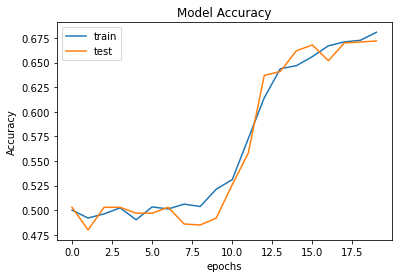

In [143]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')

In [144]:
model.save('bot_model')

INFO:tensorflow:Assets written to: bot_model/assets


INFO:tensorflow:Assets written to: bot_model/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [145]:
model.load_weights('bot_model')

In [146]:
pred_results = model.predict([input_test, queries_test])

In [147]:
story = ' '.join(word for word in testData[23][0])
story

'Daniel grabbed the apple there . Mary travelled to the bedroom . Sandra got the milk there . Daniel moved to the hallway . Daniel moved to the bathroom . Mary took the football there . Daniel discarded the apple . Sandra journeyed to the hallway .'

In [148]:
query = ' '.join(word for word in testData[23][1])
query

'Is Sandra in the bedroom ?'

In [149]:
testData[23][2]

'no'

In [150]:
val_max = np.argmax(pred_results[23])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print('Predicted answer is ', k) 
print('Probability of certainity is', pred_results[23][val_max])   

Predicted answer is  no
Probability of certainity is 0.8130792


In [151]:
story = 'Mary dropped football . Sandra discarded apple in kitchen'
story.split()

['Mary',
 'dropped',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [152]:
my_question = 'Is apple in the kitchen ?'
my_question.split()

['Is', 'apple', 'in', 'the', 'kitchen', '?']

In [153]:
my_data = [(story.split(),my_question.split(), 'yes')]

In [154]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [155]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print('Predicted answer is ', k) 
print('Probability of certainity is', pred_results[0][val_max])  

Predicted answer is  yes
Probability of certainity is 0.68644464


In [156]:
story = 'Mary dropped football . Sandra discarded apple in kitchen . Daniel went to office . '
story.split()

['Mary',
 'dropped',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen',
 '.',
 'Daniel',
 'went',
 'to',
 'office',
 '.']

In [157]:
my_question = 'Is Daniel in the hallway ?'
my_question.split()

['Is', 'Daniel', 'in', 'the', 'hallway', '?']

In [158]:
my_data = [(story.split(),my_question.split(), 'yes')]

In [159]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [160]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
  if val == val_max:
    k = key

print('Predicted answer is ', k) 
print('Probability of certainity is', pred_results[0][val_max])  

Predicted answer is  yes
Probability of certainity is 0.68644464


In [161]:
!zip -r /content/bot_model.zip /content/bot_model

  adding: content/bot_model/ (stored 0%)
  adding: content/bot_model/saved_model.pb (deflated 88%)
  adding: content/bot_model/assets/ (stored 0%)
  adding: content/bot_model/keras_metadata.pb (deflated 92%)
  adding: content/bot_model/variables/ (stored 0%)
  adding: content/bot_model/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/bot_model/variables/variables.index (deflated 62%)


In [ ]:
from google.colab import files
files.download("/content/bot_model.zip")